# Pattern recognition - team project

---
2024. 04. 29

to - do

1. Data cleaning: fixing (or filtering) incomplete or erroneous data
2. Data integration: unifying data from various sources
3. Data transformation: data formatting
4. Data discretization: converting values to a discretized data


## importing Dataset, Libraries



In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import os

root_dir = "/content/gdrive/MyDrive/pattern recognition"

# Checking if our specified directory exists
os.path.exists(root_dir)

False

In [ ]:
import pandas as pd

# Paths to the downloaded files
data_path = os.path.join(root_dir, "train.csv")

# Load data
df_train = pd.read_csv(data_path)

# Paths to the downloaded files
data_path = os.path.join(root_dir, "test.csv")

# Load data
df_test = pd.read_csv(data_path)

FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/pattern recognition/train.csv'

In [ ]:
data_path = os.path.join(root_dir, "train.csv")

df_train_ini = pd.read_csv(data_path)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import FactorAnalysis
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, StratifiedKFold
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef
from sklearn.preprocessing import LabelEncoder

## EDA

Examine the distribution of the continuous variable grouped by the target class.

In [ ]:
df_train.describe(include='all')

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,32950.000000,32950.000000,32950,32950,32950,32950,32950,32950,32950,32950,...,32950.000000,32950.000000,32950.000000,32950,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950
unique,NaN,NaN,12,4,8,3,3,3,2,10,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,admin.,married,university.degree,no,yes,no,cellular,may,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,NaN,8334,19968,9718,26094,17282,27123,20883,11026,...,NaN,NaN,NaN,28474,NaN,NaN,NaN,NaN,NaN,29238
mean,20569.615569,40.023703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567830,962.415964,0.172838,NaN,0.083129,93.576610,-40.500091,3.622516,5167.036495,NaN
std,11895.520420,10.401749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.766994,187.054556,0.498098,NaN,1.571951,0.578725,4.632363,1.734791,72.250873,NaN
min,1.000000,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,10258.250000,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,20571.000000,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,30846.750000,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [ ]:
# the distribution of the categorical variable grouped by the target class

target_counts = df_train['y'].value_counts()
target_ratio = df_train['y'].value_counts(normalize=True)

print(f"target_counts ['0'] = {target_counts[0]}  target_counts ['1'] = {target_counts[1]}")
print(f"target_ratio ['0'] = {round(target_ratio[0]*100,2)} %  target_ratio ['1'] = {round(target_ratio[1]*100)} %")

target_counts ['0'] = 29238  target_counts ['1'] = 3712
target_ratio ['0'] = 88.73 %  target_ratio ['1'] = 11 %


In [ ]:
# df_train.duplicated().sum()
# 중복값 확인 -> 없었음

# df_train.isna().sum()
# 빈값도 없었음

## Variable Analysis

In [ ]:
print("Continuous Variables","\n")
continous_vars=df_train.describe().columns
print(continous_vars)

Continuous Variables 

Index(['id', 'age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [ ]:
print("Categorical Variables","\n")
categorical_vars=df_train.describe(include=[object]).columns
print(categorical_vars)

Categorical Variables 

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


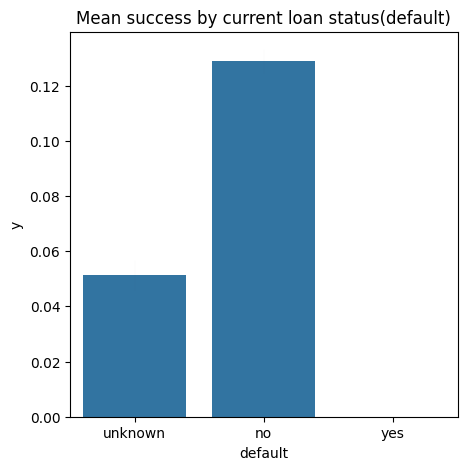

In [ ]:
#Label Encoding the class attribute
import pylab

label_encoder = LabelEncoder()
label_encoder.fit(df_train["y"])
df_train["y"] = label_encoder.transform(df_train["y"])

pylab.rcParams['figure.figsize'] = (5,5)
sns.barplot(x = 'default', y = 'y', data = df_train, errorbar=('ci', 95), err_kws = {'linewidth': 0.01})
plt.title('Mean success by current loan status(default)')
plt.show()

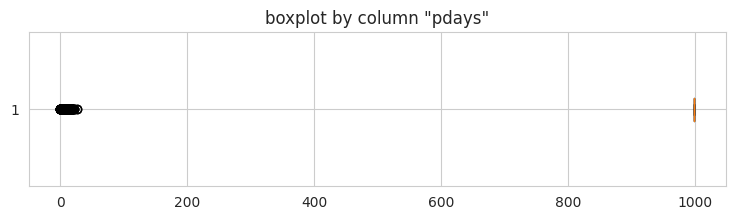

In [ ]:
plt.figure(figsize = (9, 2))
plt.boxplot(df_train_ini['pdays'], vert=False)
plt.title('boxplot by column "pdays"')
plt.show()

In [ ]:
df_train_ini['pdays'].unique()

array([999,   6,   3,   2,  13,   9,  12,   5,   7,  10,   4,  15,   1,
        18,  14,   0,  22,  16,  11,   8,  21,  17,  26,  19,  27,  20])

In [ ]:
df_train[df_train['default']=='yes']

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
9753,21582,48,technician,married,professional.course,yes,yes,no,cellular,aug,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
14482,24867,31,unemployed,married,high.school,yes,no,no,cellular,nov,...,2,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,0
24787,21581,48,technician,married,professional.course,yes,no,no,cellular,aug,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0


In [ ]:
df_train['cons.price.idx'].unique()
# 2008 ~ 2010
# https://tradingeconomics.com/portugal/consumer-price-index-cpi

array([93.918, 92.963, 93.444, 92.893, 94.027, 92.431, 94.199, 94.465,
       92.649, 93.994, 93.075, 93.2  , 94.601, 92.469, 92.201, 93.369,
       93.876, 92.713, 93.798, 92.843, 92.379, 94.055, 94.215, 93.749,
       94.767, 92.756])

Continuous Variables Visualization - train 



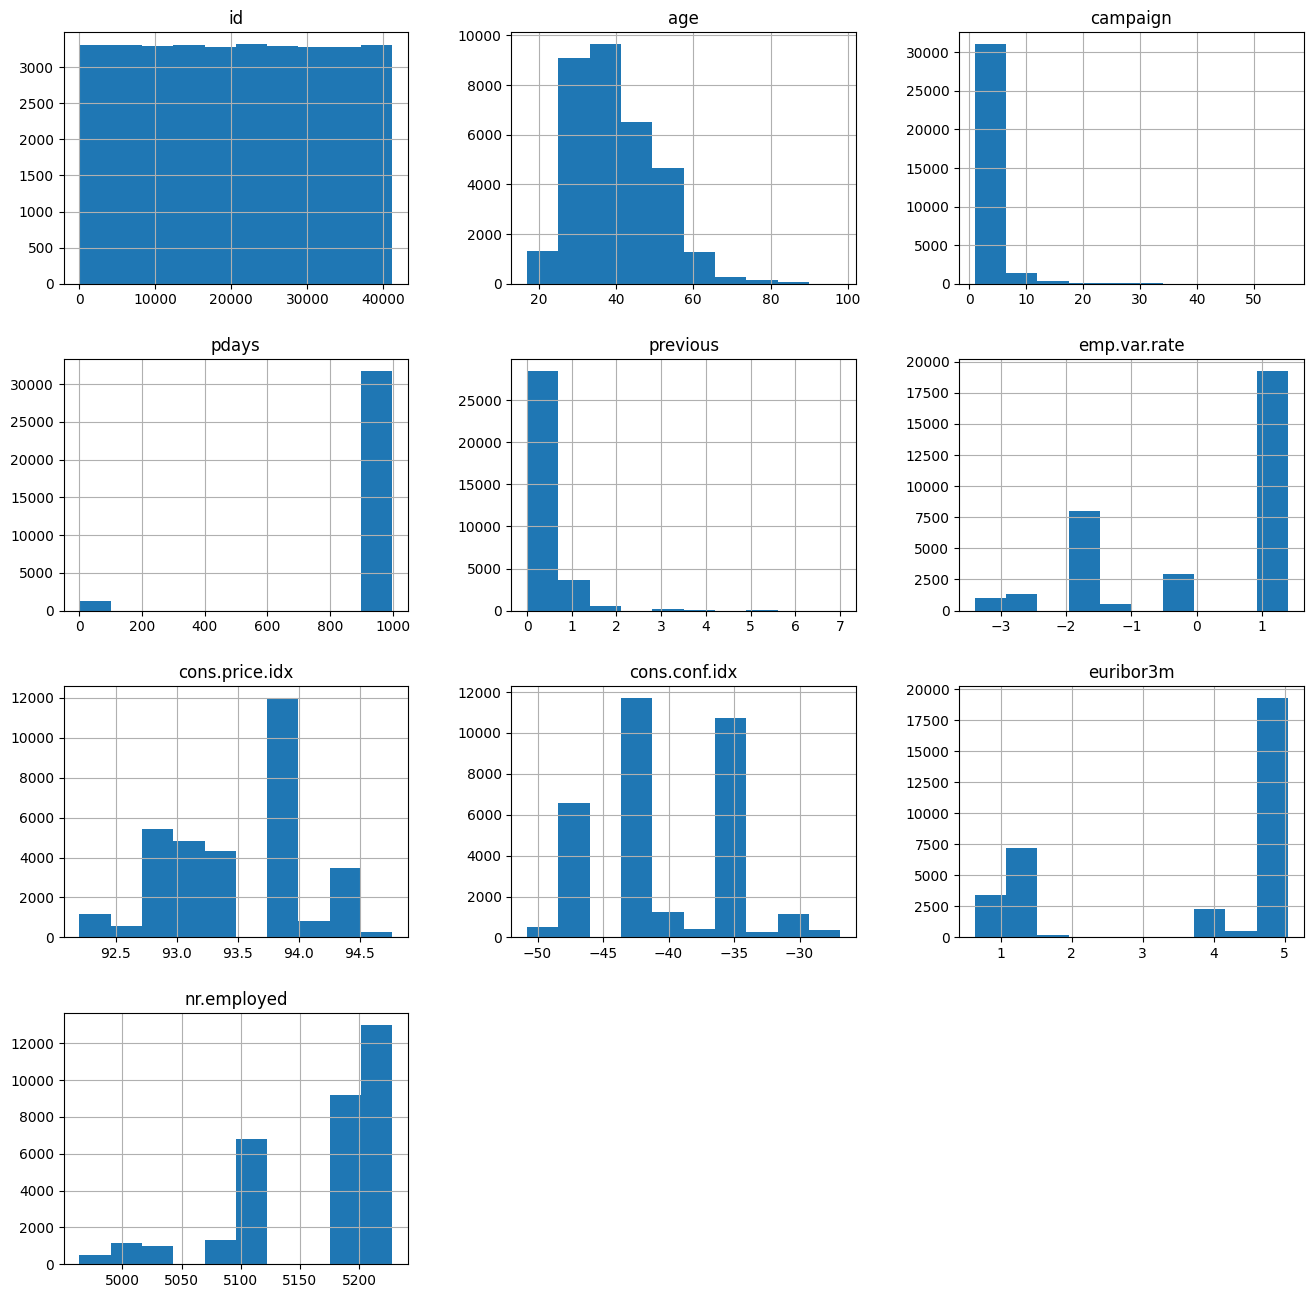

In [ ]:
print("Continuous Variables Visualization - train","\n")
df_train.hist(column=continous_vars,figsize=(16, 16))
plt.show()

Categorical Variables Visualization_test 



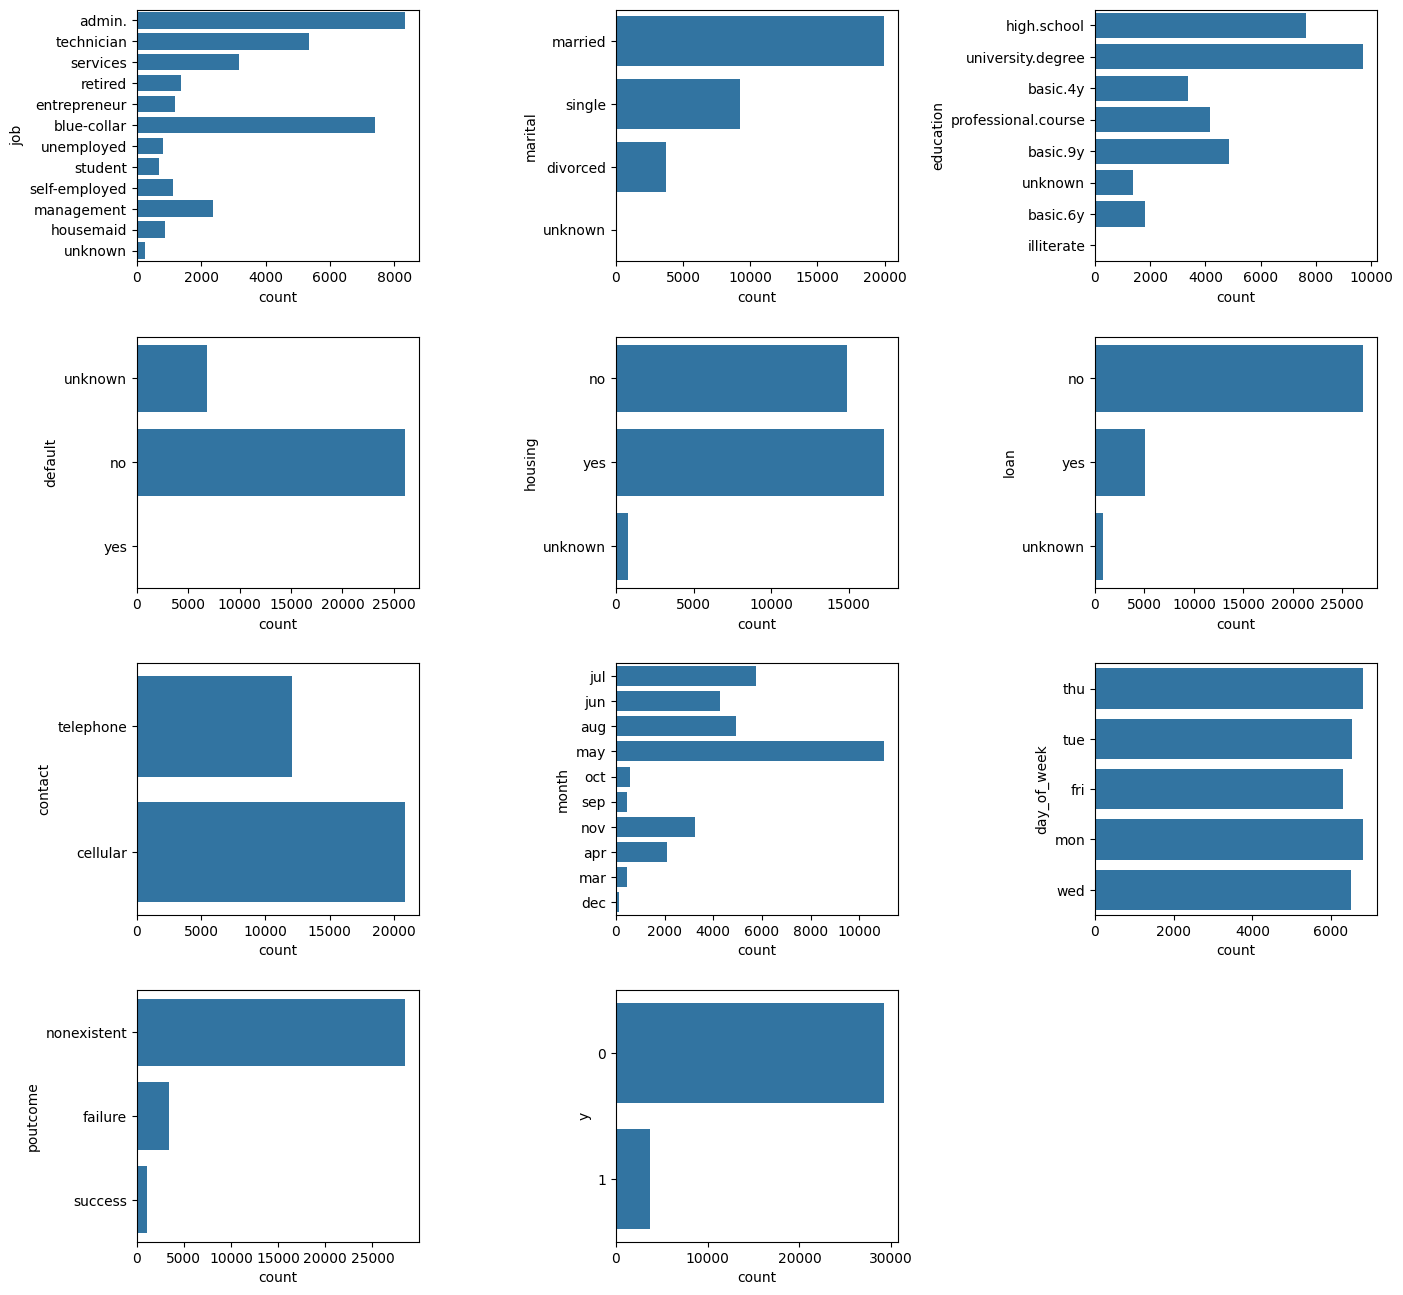

In [ ]:
print("Categorical Variables Visualization_test","\n")
fig, axes = plt.subplots(4, 3, figsize=(16, 16))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.3)
for i, ax in enumerate(axes.ravel()):
    if i > 10:
        ax.set_visible(False)
        continue
    sns.countplot(y = categorical_vars[i], data=df_train, ax=ax)
plt.show()

Eliminate variables that are not utilized as inputs or that contain numerous missing values.

Impute the missing values:
* Continuous variables: mean value
* Categorical variables: most frequent value

 => 근데 없어서 안채워넣었음

In [ ]:
# Encode the Categorical Variables.

df_train["month"] = df_train["month"].replace({"jul": 7, "jun": 6, "aug": 8, "may": 5, "oct" : 10, 'sep': 9, "nov": 11, "apr": 4, "mar":3, "dec": 12})

df_train["year"] = df_train["cons.price.idx"]
df_train["year"] = df_train["cons.price.idx"].replace({93.918 : 2008, 92.963 : 2009, 93.444 : 2008, 92.893 : 2009,
                                                       94.027 : 2010, 92.431 : 2009, 94.199 : 2010, 94.465 : 2008,
                                                       92.649 : 2009, 93.994 : 2008, 93.075 : 2009, 93.2 : 2008,
                                                       94.601 : 2010, 92.469 : 2009, 92.201 : 2009, 93.369 : 2010,
                                                       93.876 : 2010, 92.713 : 2009, 93.798 : 2008, 92.843 : 2009,
                                                       92.379 : 2009, 94.055 : 2010, 94.215 : 2010, 93.749 : 2010,
                                                       94.767 : 2010, 92.756 : 2008})

In [ ]:
df_train=df_train.drop(["pdays"],axis=1)

KeyError: "['pdays'] not found in axis"

In [ ]:
df_train.loc[df_train['age'] >= 65, 'job'] = 'retired'

In [ ]:
df_train['job'].replace('unknown', df_train['job'].mode().iloc[0], inplace=True)

In [ ]:
df_train['loan'].replace('unknown', df_train['loan'].mode().iloc[0], inplace=True)

In [ ]:
df_train['marital'].replace('unknown', df_train['marital'].mode().iloc[0], inplace=True)

In [ ]:
conti_var_new =df_train.describe().columns

Correlation Matrix 



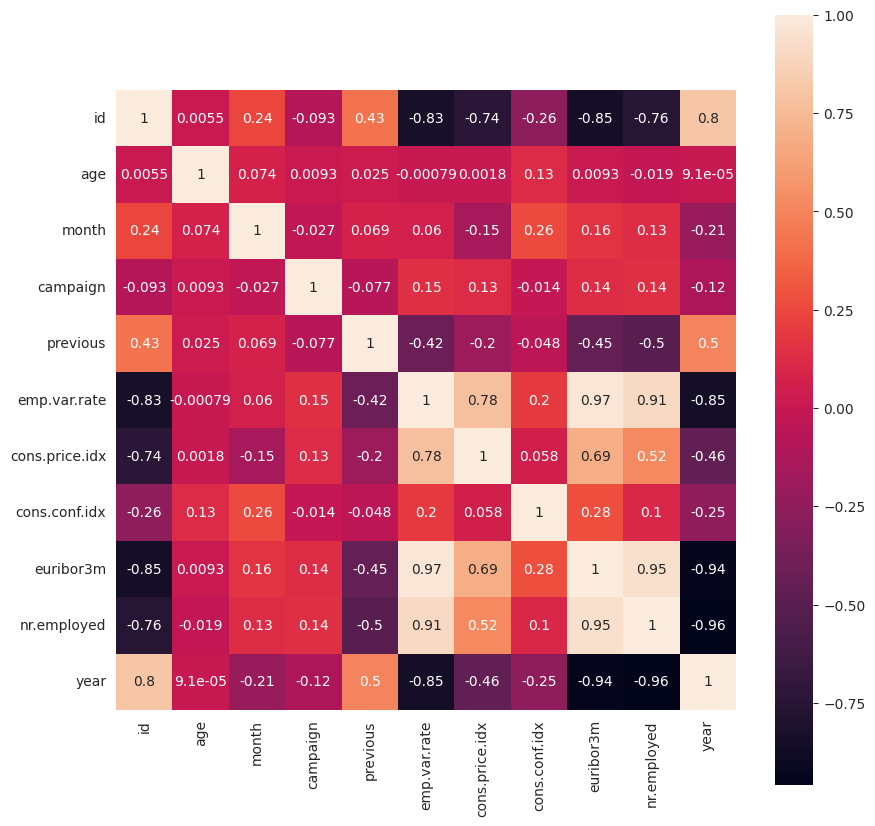

In [ ]:
#히트맵
corrdf = df_train[conti_var_new]
print("Correlation Matrix","\n")
corrdf = df_train[conti_var_new]
correlation=corrdf.corr(method="pearson")
plt.figure(figsize=(10, 10))
sns.heatmap(correlation,vmax=1,square=True,annot=True)
plt.show()

# 다중공선성이 보임

In [ ]:
df_train = df_train.drop(labels=["euribor3m", "nr.employed"], axis=1)

## make Dummy variables

In [ ]:
columns = df_train.select_dtypes(include=[object]).columns
df = pd.concat([df_train, pd.get_dummies(df_train[columns])], axis=1)
df = df.drop(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week','poutcome', 'y'], axis =1)
print("\n","Describe Dataset_v2","\n")
print(df.info(),"\n \n \n")


 Describe Dataset_v2 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             32950 non-null  int64  
 1   age                            32950 non-null  int64  
 2   campaign                       32950 non-null  int64  
 3   previous                       32950 non-null  int64  
 4   emp.var.rate                   32950 non-null  float64
 5   cons.price.idx                 32950 non-null  float64
 6   cons.conf.idx                  32950 non-null  float64
 7   year                           32950 non-null  float64
 8   pdays_cat                      32950 non-null  int64  
 9   job_admin.                     32950 non-null  bool   
 10  job_blue-collar                32950 non-null  bool   
 11  job_entrepreneur               32950 non-null  bool   
 12  job_housemaid         

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder()
onehot = pd.DataFrame(encoder.fit_transform(df_train[['y']]).toarray(), columns = encoder.get_feature_names_out())
df = pd.concat([df,onehot], axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             32950 non-null  int64  
 1   age                            32950 non-null  int64  
 2   campaign                       32950 non-null  int64  
 3   previous                       32950 non-null  int64  
 4   emp.var.rate                   32950 non-null  float64
 5   cons.price.idx                 32950 non-null  float64
 6   cons.conf.idx                  32950 non-null  float64
 7   year                           32950 non-null  float64
 8   pdays_cat                      32950 non-null  int64  
 9   job_admin.                     32950 non-null  bool   
 10  job_blue-collar                32950 non-null  bool   
 11  job_entrepreneur               32950 non-null  bool   
 12  job_housemaid                  32950 non-null 

### Scaling, Train-Test Split, Downsampling

* Split data into train and test sets ([model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html))

In [ ]:
min_max_scaler=preprocessing.MinMaxScaler()
data_scaled=pd.DataFrame(min_max_scaler.fit_transform(df),columns=df.columns)

In [ ]:
y = data_scaled.y_0
data_scaled = data_scaled.drop(['y_0','y_1'], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled, y, shuffle=True, test_size=0.2, random_state=42)

In [ ]:
'''from imblearn.under_sampling import OneSidedSelection
random_state = 42

X_samp, y_samp = OneSidedSelection(random_state=random_state,
                                   n_neighbors = 1, n_seeds_S = 1).fit_resample(X_train, y_train)

In [ ]:
from imblearn.combine import *

In [ ]:
# X_samp, y_samp = SMOTETomek(random_state=random_state).fit_resample(X_train, y_train)

X_samp, y_samp = SMOTEENN(random_state=0).fit_resample(X_train, y_train)

## Training & Validation

Models
* Random forest
* Decision Tree
* Gradient Boosting

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import KFold, cross_val_score

In [ ]:
#file -> model load
model = joblib.load('')
model.score(X_test, y_test)

## Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# model.fit(X_train, y_train)
model.fit(X_samp, y_samp)

y_prob = model.predict_proba(X_test)
print("Estimated probs:", y_prob[:10])

y_cls = model.predict(X_test)
print("Estimated classes:", y_cls[:10])
print()

Estimated probs: [[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]
Estimated classes: [1. 0. 1. 0. 1. 1. 1. 0. 1. 1.]



* Accuracy ([metrics.accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html))
* F1 ([metrics.f1_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html))
* ROC AUC ([metrics.roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html))

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_cls))
print("F1:", f1_score(y_test, y_cls))
print("ROC AUC:", roc_auc_score(y_test, y_prob[:, 1]))

Accuracy: 0.8447647951441578
F1: 0.9104751903386715
ROC AUC: 0.6904693506764348


* Confusion Matrix ([metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html))

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_cls)
conf_matrix_df = pd.DataFrame(
    conf_matrix,
    columns=["Predicted yes", "Predicted no"],
    index=["Actual yes", "Actual no"]
)
print(conf_matrix_df)

            Predicted yes  Predicted no
Actual yes            365           378
Actual no             645          5202


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_cls))

              precision    recall  f1-score   support

         0.0       0.36      0.49      0.42       743
         1.0       0.93      0.89      0.91      5847

    accuracy                           0.84      6590
   macro avg       0.65      0.69      0.66      6590
weighted avg       0.87      0.84      0.85      6590



* ROC Curve ([metrics.roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html))

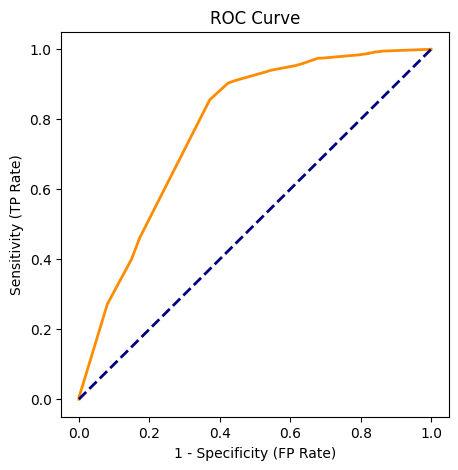

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])

plt.plot(fpr, tpr, color="darkorange", lw=2)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("1 - Specificity (FP Rate)")
plt.ylabel("Sensitivity (TP Rate)")
plt.title("ROC Curve")
plt.show()

## Interpretation

### Decision Tree
* Plot a decision tree ([tree.plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html))

In [ ]:
feature_names = df.columns
target_names = ['Yes', 'No']

In [ ]:
from sklearn.tree import plot_tree

# Decision tree
model = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=2, min_impurity_decrease=0.0)
# model = DecisionTreeClassifier(max_depth=3, min_samples_split=2, min_impurity_decrease=0.0)
model.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, impurity=True, feature_names=feature_names, class_names=target_names, rounded=True)
plt.show()